# Imports 

In [1]:
print('hi')

hi


In [2]:
import sys
sys.path

['C:\\_Lib\\python\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\Grape on multiple modes',
 'C:\\_Lib\\python',
 'C:\\_Lib\\python\\qoc',
 'C:\\_Lib\\python\\ECD_control',
 'C:\\_Lib\\python\\Multimode-Conditional-Displacements\\hpc_runs\\multimode_circle_grape\\Grape on multiple modes',
 'C:\\Users\\cssri\\Anaconda3\\python38.zip',
 'C:\\Users\\cssri\\Anaconda3\\DLLs',
 'C:\\Users\\cssri\\Anaconda3\\lib',
 'C:\\Users\\cssri\\Anaconda3',
 '',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\pyepr-0.8-py3.8.egg',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\ezdxf-0.16.4b2-py3.8-win-amd64.egg',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\pint-0.17-py3.8.egg',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\sphinx_rtd_theme-0.5.2-py3.8.egg',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\xarray-0.18.2-py3.8.egg',
 'C:\\Users\\cssri\\Anaconda3\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg',


In [3]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [10]:
sys.path.append(r'C:\_Lib\python\quantum-optimal-control')
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [21]:
#TODO: Figure out why relative import doesn't work
sys.path.append(r'C:\_Lib\python\Multimode-Conditional-Displacements\hpc_runs\multimode_circle_grape\class_description')
from circle_grape_v4 import *

In [12]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [13]:
# chi = Peak splitting MHz
chis = array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [15]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = 0$ GHz, $\tau = 1500$ ns, $\Omega_{max} =10$ MHz

In [22]:
mode = 2
mode_levels = 10
chi,kappa = chis[:mode]*1e-6,kappas[:mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":30.0,"delta_c":0.01}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 2,hparams = circle_grape_params,add_disp_kerr=False)




In [24]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [27]:
states_forbidden_list = []
total_time = 2000.0
steps  = 1000 #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 200,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None

# ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
#                         total_time = total_time, steps = steps,max_amp = 0.001, 
#                         taylor_terms = None,is_dressed=False, 
#                         convergence = convergence, reg_coeffs =  reg_coeffs,
#                         plot_only_g = True,
#                         states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
#                         file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

['H0', 'Hnames', 'Hops', 'U', 'convergence', 'error', 'initial_vectors_c', 'inter_vecs_imag', 'inter_vecs_mag_squared', 'inter_vecs_raw_imag', 'inter_vecs_raw_real', 'inter_vecs_real', 'iteration', 'maxA', 'method', 'reg_coeffs', 'reg_error', 'run_time', 'sparse_H', 'sparse_K', 'sparse_U', 'states_concerned_list', 'steps', 'taylor_scaling', 'taylor_terms', 'total_time', 'uks', 'unitary_scale', 'use_gpu']
0.07014586
data saved at: 00011_g0_to_g1_circlgrape.h5

KeyboardInterrupt: 

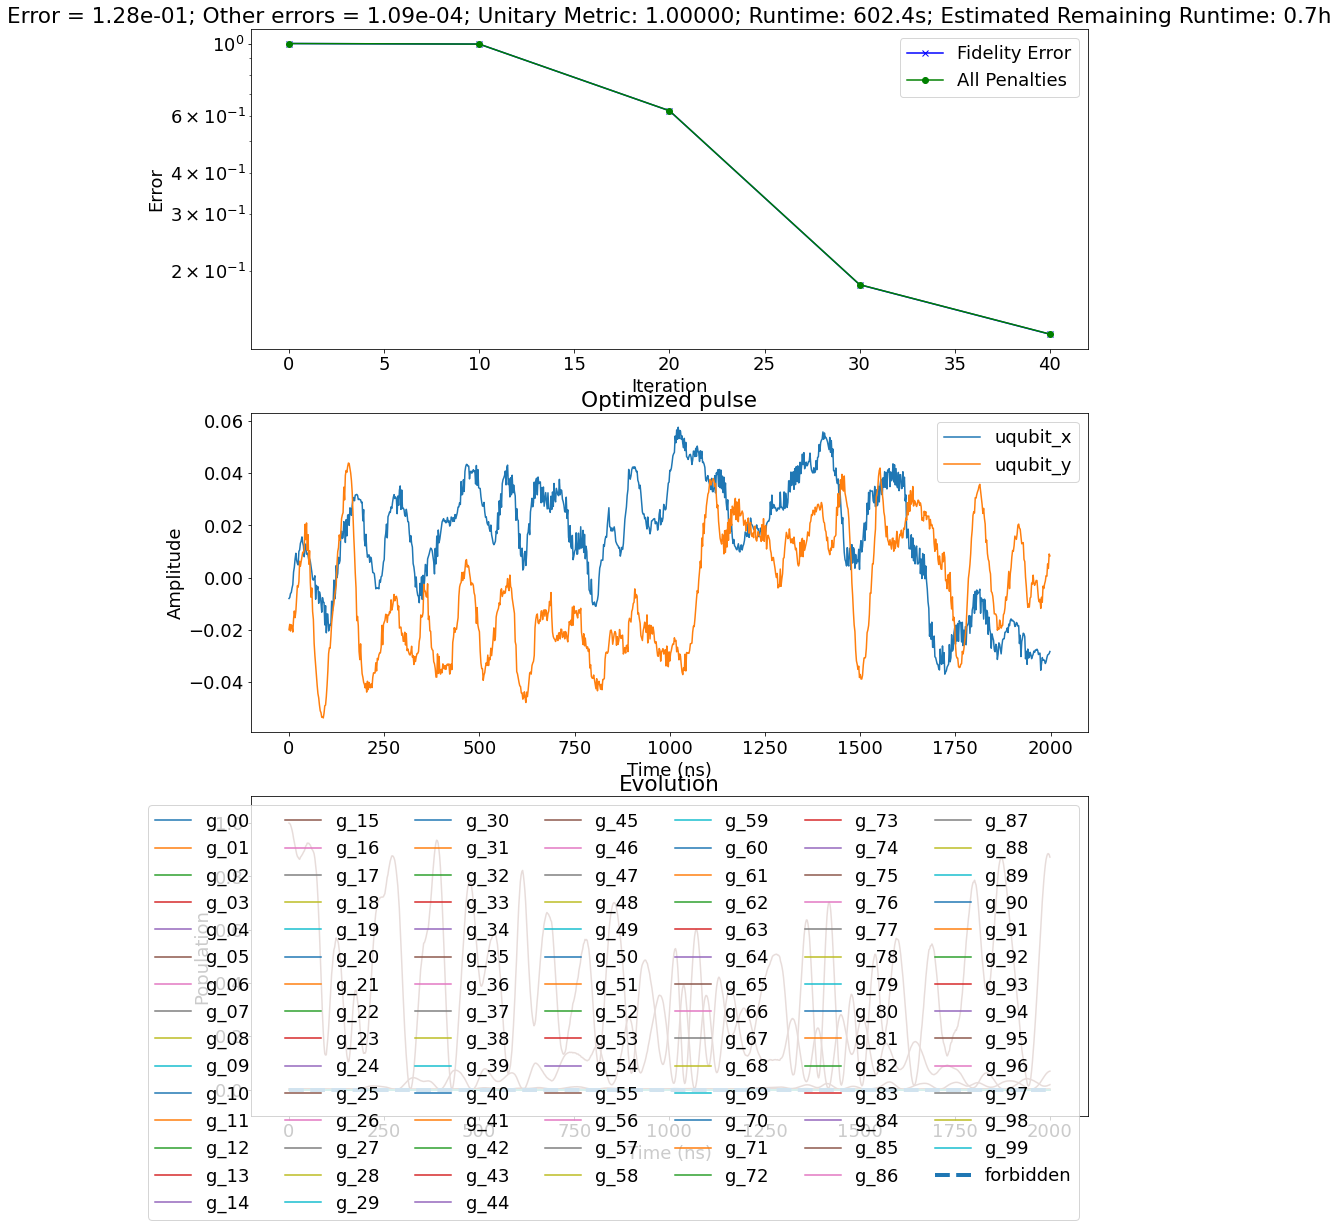

In [28]:
qubit_drive_amp = 0.01 # Ghz
ss = op.run_optimal_control(state_transfer = True, initial_states = [5], target_states = [mode_levels + 5], 
                        total_time = total_time, steps = steps,max_amp = qubit_drive_amp, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)


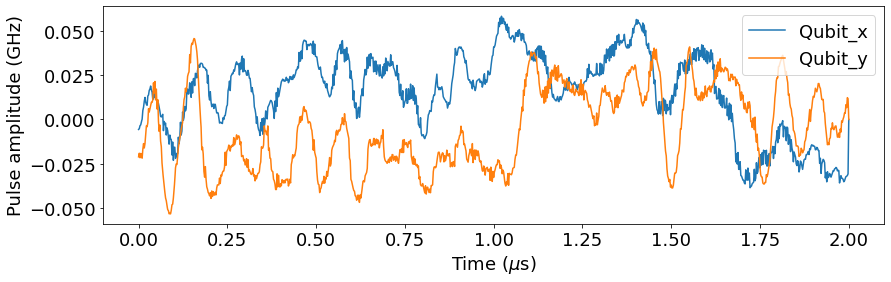

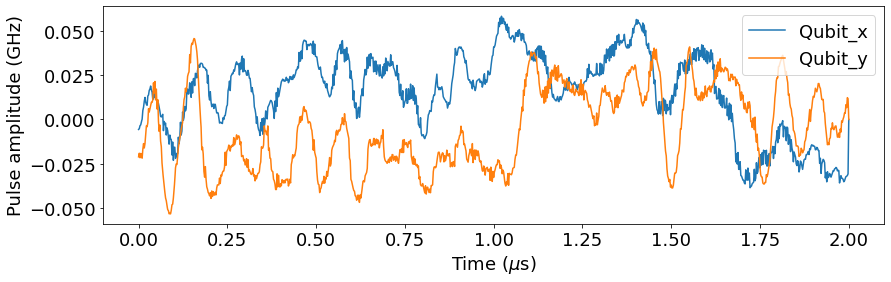

In [32]:
op.plot_pulses('00011_g0_to_g1_circlgrape.h5')

running mesolve for rotating frame


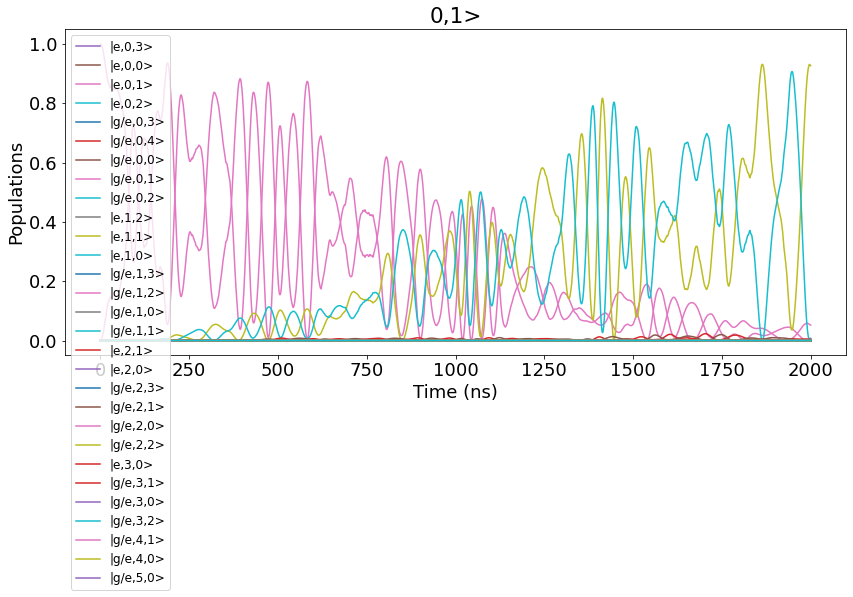

In [74]:
op.plot_mesolve(start_state = [0, 1],MAX = 5, filename = '00011_g0_to_g1_circlgrape.h5')

In [40]:
H0 = Qobj(op.H_rot())
e_vecs = H0.eigenstates()[1]
e_ops = [e_vec*e_vec.dag() for e_vec in e_vecs]

In [75]:
#n = 2

In [76]:
#np.argmax(np.array(e_vecs[n]))

In [77]:
#np.max(np.array(e_vecs[n]))

In [39]:
t_list, out= op.qutip_mesolve(start_state = [0, 1], filename = '00011_g0_to_g1_circlgrape.h5')

In [42]:
pops= [out.expect[ii] for ii in arange(len(e_ops))]

In [51]:
maxx = 0
n_max = None
for n in range(40): 
    if pops[n][-1] > maxx: 
        maxx = pops[n][-1]
        n_max = n
n_max

28

In [52]:
maxx

0.9262668031353525

In [44]:
np.shape(pops)

(200, 2001)

In [87]:
t_list, out= op.qutip_mesolve_new(start_state = [0, 0,0,0,0,1], filename = '00011_g0_to_g1_circlgrape.h5')

In [88]:
out.states[-1]

Quantum object: dims = [[200], [200]], shape = (200, 200), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]

In [89]:
target = tensor(basis(2, 0), basis(10,1), basis(10,5))

In [98]:
rho_t = Qobj(np.array(target*target.dag()))

In [99]:
rho = out.states[-1]
rho = Qobj(np.array(rho))

In [100]:
rho_t.overlap(rho)

0.9317331260961855

In [14]:
hf = op.openfile()

In [18]:
list(hf.keys())

['H0',
 'Hnames',
 'Hops',
 'U',
 'convergence',
 'error',
 'initial_vectors_c',
 'inter_vecs_imag',
 'inter_vecs_mag_squared',
 'inter_vecs_raw_imag',
 'inter_vecs_raw_real',
 'inter_vecs_real',
 'iteration',
 'maxA',
 'method',
 'reg_coeffs',
 'reg_error',
 'run_time',
 'sparse_H',
 'sparse_K',
 'sparse_U',
 'states_concerned_list',
 'steps',
 'taylor_scaling',
 'taylor_terms',
 'total_time',
 'uks',
 'unitary_scale',
 'use_gpu',
 'wall_clock_time']

In [21]:
list(hf['unitary_scale'])

[1.0102822,
 0.9984515,
 0.96138597,
 0.9566205,
 0.92183363,
 0.9355261,
 0.8537254,
 0.8692746,
 0.8656633,
 0.9338774,
 0.95502955]

Text(0, 0.5, 'errors')

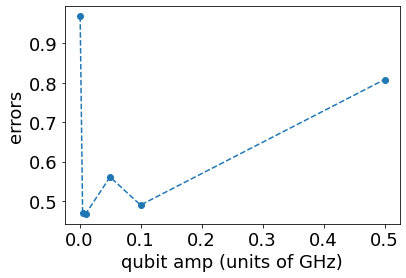

In [68]:
import matplotlib.pyplot as plt
plt.plot(amps, fids, marker = 'o', linestyle = '--')
plt.xlabel('qubit amp (units of GHz)')
plt.ylabel('errors')

In [3]:
import numpy as np 
np.log10(10)

1.0

Text(0.5, 1.0, 'g0->g1; 1000 microseconds')

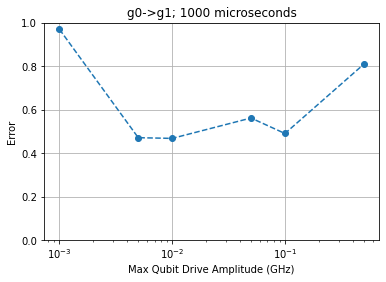

In [11]:
import matplotlib.pyplot as plt
amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
errs= [0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]
plt.semilogx(amps, errs, marker = 'o', linestyle = '--')
plt.grid(True)
#plt.plot(amps, fids, )
plt.xlabel('Max Qubit Drive Amplitude (GHz)')
plt.ylabel('Error')
plt.ylim([0,1])
plt.title('g0->g1; 1000 microseconds')

[0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]

In [ ]:
hf = op.openfile()

In [ ]:
hf['error'][-1]

In [ ]:
op.plot_pulses()

In [ ]:
ss

In [ ]:
len(ss[0][0])

In [ ]:
op.fidelity()

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id